In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
#Read both the files

CurrentApplication=pd.read_csv("application_data.csv")
PreviousApplication=pd.read_csv("previous_application.csv")

In [3]:
CurrentApplication.shape

(307511, 122)

In [4]:
CurrentApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#Check for the number of null values
CurrentApplication.isna().sum(axis=0)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [6]:
# Check the columns which are more than 50% nan values
(CurrentApplication.columns[100*CurrentApplication.isna().sum(axis=0)/len(CurrentApplication.index)> 50])

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [7]:
CurrentApplication["EXT_SOURCE_1"].fillna(0,inplace=True)

In [8]:
#Remove the columns which are more than 50% nan values
CurrentApplication.drop(CurrentApplication.columns[100*CurrentApplication.isnull().sum(axis=0)/len(CurrentApplication.index) >50], axis=1,inplace=True)

In [9]:
df=round(100*CurrentApplication.isna().sum(axis=0)/len(CurrentApplication.index),2)
df.sort_values(ascending=False)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
NAME_TYPE_SUITE                  0.42
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [10]:
#Remove the coloumns that are not neccessary

CurrentApplication.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"], axis=1,inplace=True)

In [11]:
CurrentApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [12]:
# Changing the dtype as per the data

#CurrentApplication["TARGET"]=CurrentApplication["TARGET"].astype('category',errors='ignore')
CurrentApplication["CODE_GENDER"]=CurrentApplication["CODE_GENDER"].astype('category',errors='ignore')
CurrentApplication["NAME_INCOME_TYPE"]=CurrentApplication["NAME_INCOME_TYPE"].astype('category',errors='ignore')
CurrentApplication["NAME_EDUCATION_TYPE"]=CurrentApplication["NAME_EDUCATION_TYPE"].astype('category',errors='ignore')
CurrentApplication["OCCUPATION_TYPE"]=CurrentApplication["OCCUPATION_TYPE"].astype('category',errors='ignore')


# Finding and Treating outliers

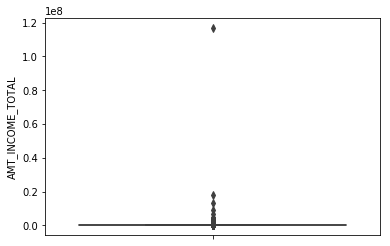

In [13]:
sns.boxplot(y=CurrentApplication["AMT_INCOME_TOTAL"])
plt.show()

In [14]:
df_income=CurrentApplication[CurrentApplication["AMT_INCOME_TOTAL"]<CurrentApplication["AMT_INCOME_TOTAL"].quantile(.97)]

In [15]:
df_income.shape

(298255, 62)

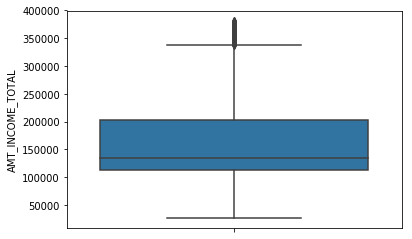

In [16]:
sns.boxplot(y=df_income["AMT_INCOME_TOTAL"])
plt.show() 

In [17]:
df_income["DAYS_BIRTH"]=[round(each/-365,2) for each in df_income["DAYS_BIRTH"] ]
df_income["DAYS_EMPLOYED"]=[round(each/-365,2) for each in df_income["DAYS_EMPLOYED"] ]
df_income["DAYS_ID_PUBLISH"]=[round(each/-365,2) for each in df_income["DAYS_ID_PUBLISH"] ]
df_income["DAYS_LAST_PHONE_CHANGE"]=[round(each/-365,2) for each in df_income["DAYS_LAST_PHONE_CHANGE"] ]

In [18]:
df_income.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,3.11,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,2.27,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,2.23,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,1.69,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,3.03,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_income.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATAT

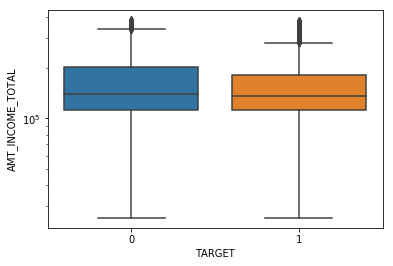

In [20]:
sns.boxplot(y=df_income["AMT_INCOME_TOTAL"],x=df_income["TARGET"],data=df_income)
plt.yscale('log')
plt.show()

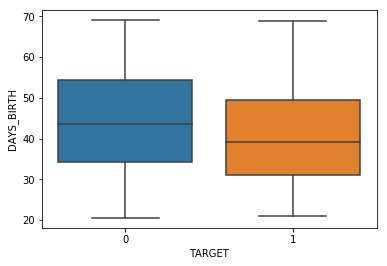

In [21]:
sns.boxplot(y=df_income["DAYS_BIRTH"],x=df_income["TARGET"],data=df_income)
#plt.yscale('log')
plt.show()

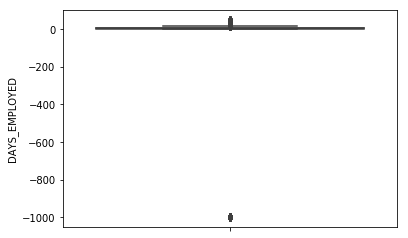

In [22]:
sns.boxplot(y=df_income['DAYS_EMPLOYED'])
plt.show()

In [23]:
df_income.loc[df_income['DAYS_EMPLOYED'] ==(-1000.67), 'DAYS_EMPLOYED'] = np.nan

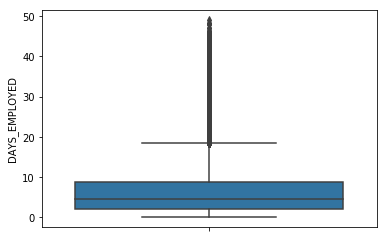

In [24]:
sns.boxplot(y=df_income['DAYS_EMPLOYED'])
plt.show()

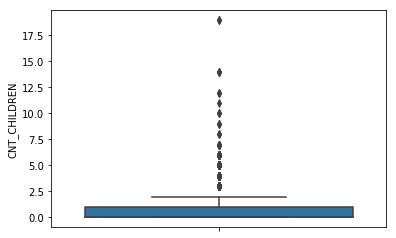

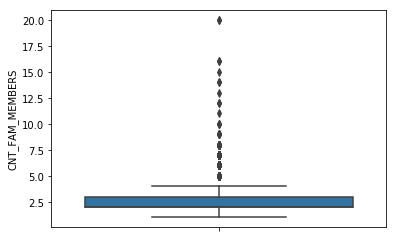

In [25]:
sns.boxplot(y=df_income["CNT_CHILDREN"])
plt.show()
sns.boxplot(y=df_income["CNT_FAM_MEMBERS"])
plt.show()

In [26]:
df_income["CNT_CHILDREN"].describe()

count    298255.000000
mean          0.415101
std           0.720673
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [27]:
Target0=df_income.loc[df_income["TARGET"]==0]
Target1=df_income.loc[df_income["TARGET"]==1]

In [72]:
Target0_num=Target0[['AMT_CREDIT', 'AMT_ANNUITY','CNT_CHILDREN', 'AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']]

In [73]:
Target1_num=Target1[['AMT_CREDIT', 'AMT_ANNUITY','CODE_GENDER','CNT_CHILDREN', 'AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']]

In [30]:
Target1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATAT

# Univariate/Bivariate Analysis - Categorical

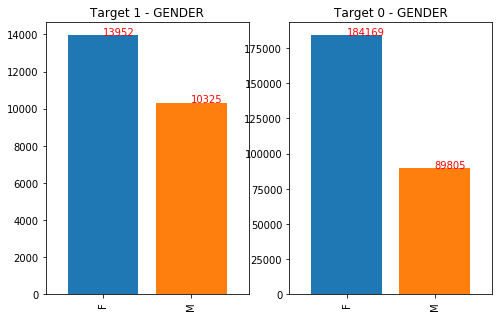

In [31]:
plt.figure(figsize=(8,5))
plt.figure(1)
plt.subplot(121)
plt.title("Target 1 - GENDER")
d=Target1["CODE_GENDER"].value_counts().head(2)
ax=d.plot.bar(width=.8)

for i, v in d.reset_index().iterrows():
    ax.text(i, v.CODE_GENDER - 0.3  , v.CODE_GENDER, color='red')
    

plt.subplot(122)
plt.title("Target 0 - GENDER")
d=Target0["CODE_GENDER"].value_counts().head(2)
ax=d.plot.bar(width=.8)

for i, v in d.reset_index().iterrows():
    ax.text(i, v.CODE_GENDER - 0.6 , v.CODE_GENDER, color='red')


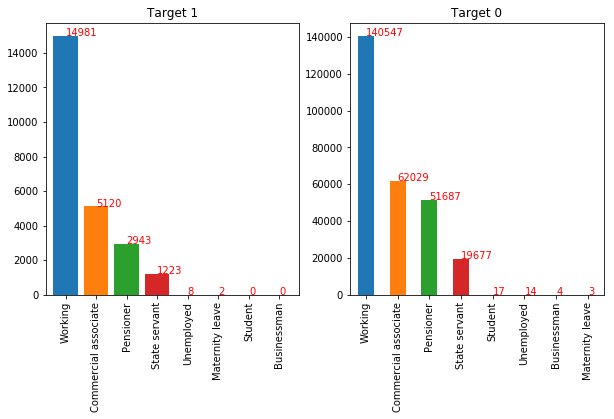

In [63]:
plt.figure(figsize=(10,5))
plt.figure(1)
plt.subplot(121)
plt.title("Target 1")
d=Target1["NAME_INCOME_TYPE"].value_counts()
ax=d.plot.bar(width=.8)

for i, v in d.reset_index().iterrows():
    ax.text(i, v.NAME_INCOME_TYPE - 0.3  , v.NAME_INCOME_TYPE, color='red')
    

plt.subplot(122)
plt.title("Target 0")
d=Target0["NAME_INCOME_TYPE"].value_counts()
ax=d.plot.bar()

for i, v in d.reset_index().iterrows():
    ax.text(i, v.NAME_INCOME_TYPE  , v.NAME_INCOME_TYPE, color='red')


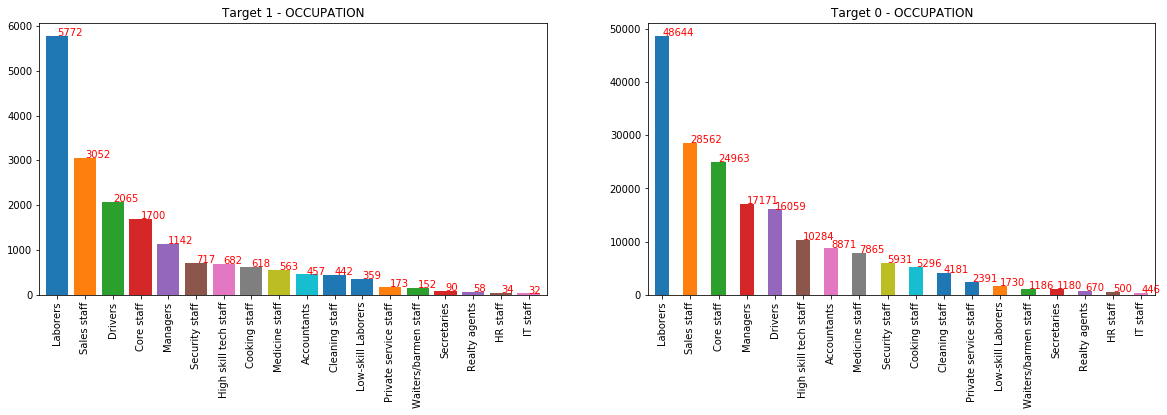

In [33]:
plt.figure(figsize=(20,5))
plt.figure(1)
plt.subplot(121)
plt.title("Target 1 - OCCUPATION")
d=Target1["OCCUPATION_TYPE"].value_counts()
ax=d.plot.bar(width=.8)

for i, v in d.reset_index().iterrows():
    ax.text(i, v.OCCUPATION_TYPE - 0.3  , v.OCCUPATION_TYPE, color='red')
    

plt.subplot(122)
plt.title("Target 0 - OCCUPATION")
d=Target0["OCCUPATION_TYPE"].value_counts()
ax=d.plot.bar()

for i, v in d.reset_index().iterrows():
    ax.text(i, v.OCCUPATION_TYPE  , v.OCCUPATION_TYPE, color='red')


# Univariate Analysis - Numerical

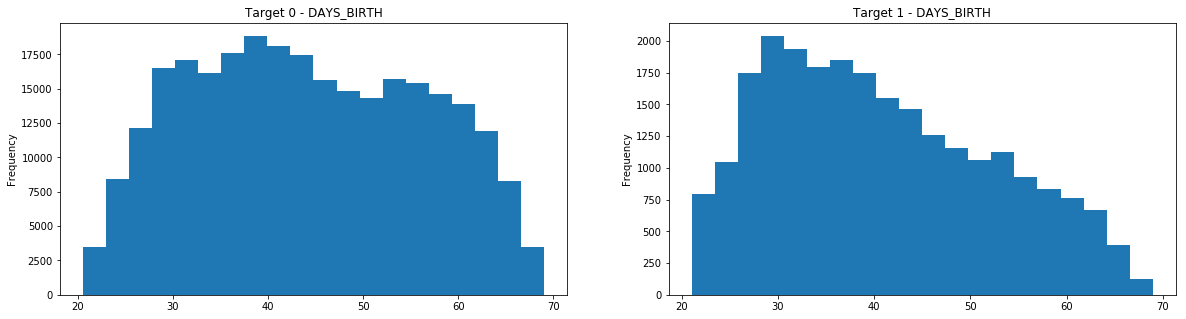

In [34]:
plt.figure(figsize=(20,5))
plt.figure(1)
plt.subplot(121)
plt.title("Target 0 - DAYS_BIRTH")
Target0["DAYS_BIRTH"].plot.hist(bins=20)
#plt.show()

plt.subplot(122)
plt.title("Target 1 - DAYS_BIRTH")
Target1["DAYS_BIRTH"].plot.hist(bins=20)
#plt.show()

   


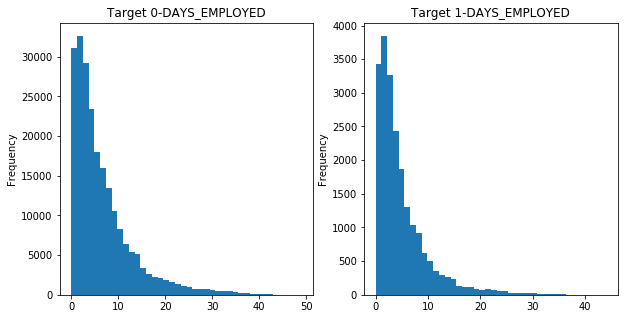

In [35]:
plt.figure(figsize=(10,5))
plt.figure(1)
plt.subplot(121)
plt.title("Target 0-DAYS_EMPLOYED")
Target0["DAYS_EMPLOYED"].plot.hist(bins=40)
 
plt.subplot(122)
plt.title("Target 1-DAYS_EMPLOYED")
#plt.xscale()
Target1["DAYS_EMPLOYED"].plot.hist(bins=40)

In [36]:
Target1["DAYS_EMPLOYED"].describe()

count    21326.000000
mean         4.961529
std          5.067004
min         -0.000000
25%          1.620000
50%          3.360000
75%          6.500000
max         44.020000
Name: DAYS_EMPLOYED, dtype: float64

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]), <a list of 9 Text xticklabel objects>)

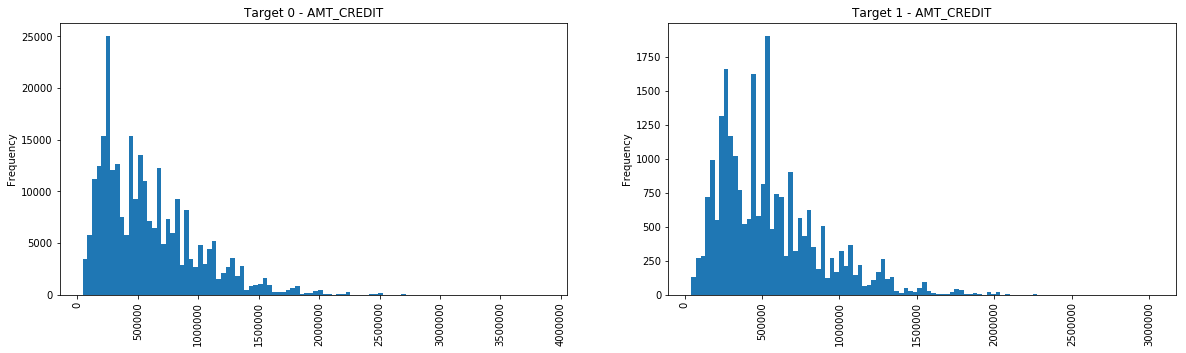

In [37]:
plt.figure(figsize=(20,5))
plt.figure(1)
plt.subplot(121)
plt.title("Target 0 - AMT_CREDIT")
Target0["AMT_CREDIT"].plot.hist(bins=100)
plt.xticks(rotation=90)

    
    
plt.subplot(122)
plt.title("Target 1 - AMT_CREDIT")
Target1["AMT_CREDIT"].plot.hist(bins=100)
plt.xticks(rotation=90)

   


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]), <a list of 9 Text xticklabel objects>)

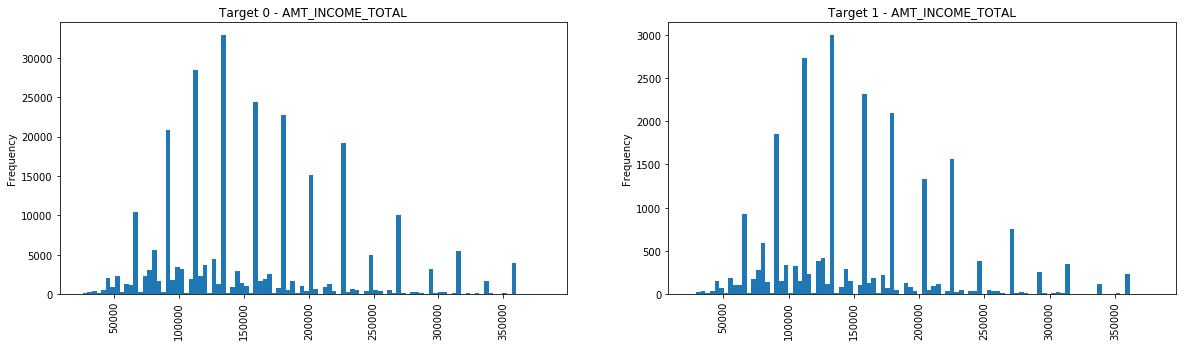

In [54]:
plt.figure(figsize=(20,5))
plt.figure(1)
plt.subplot(121)
plt.title("Target 0 - AMT_INCOME_TOTAL")
Target0["AMT_INCOME_TOTAL"].plot.hist(bins=100)
plt.xticks(rotation=90)

    
    
plt.subplot(122)
plt.title("Target 1 - AMT_INCOME_TOTAL")
Target1["AMT_INCOME_TOTAL"].plot.hist(bins=100)
plt.xticks(rotation=90)


   


In [39]:
Target1["AMT_INCOME_TOTAL"].describe()

count     24277.000000
mean     153241.039070
std       64480.473838
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      378900.000000
Name: AMT_INCOME_TOTAL, dtype: float64

# Bivariate Analysis - Numerical

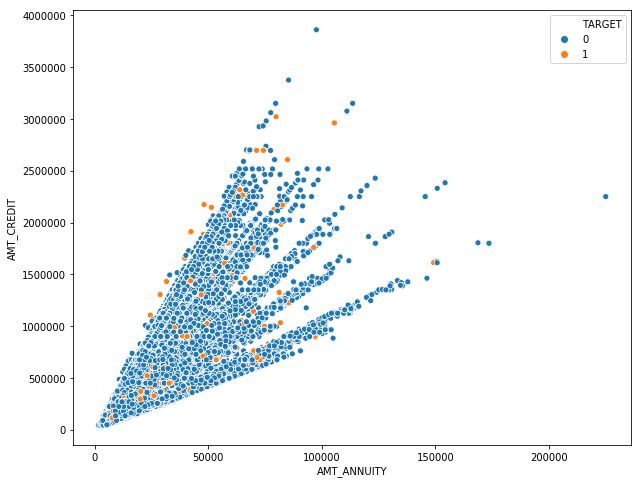

In [55]:
#plt.hexbin(x=df_income['AMT_ANNUITY'],y=df_income['AMT_CREDIT'],gridsize=20)
#plt.show()
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_income['AMT_ANNUITY'],y=df_income['AMT_CREDIT'],hue=df_income['TARGET'])
plt.show()

In [41]:
df_income['Installments']=(df_income['AMT_CREDIT']/df_income['AMT_ANNUITY'])


In [42]:
df_income['Installments'].describe()

count    298243.000000
mean         21.570151
std           7.803286
min           8.036674
25%          15.591069
50%          20.000000
75%          27.012570
max          45.305079
Name: Installments, dtype: float64

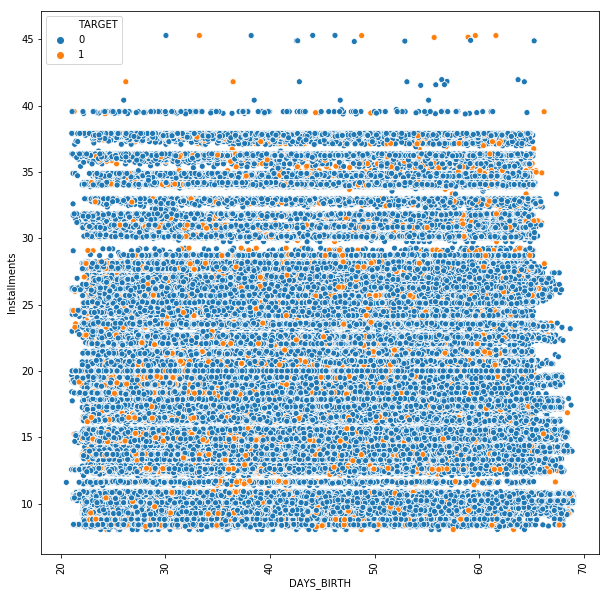

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Installments',x='DAYS_BIRTH',data=df_income,hue='TARGET')
plt.xticks(rotation=90)
plt.show()


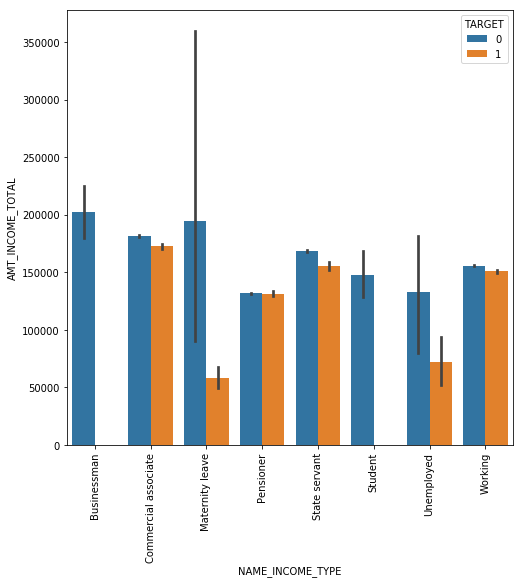

In [44]:
plt.figure(figsize=(8,8))
#d=Target1["NAME_INCOME_TYPE"].value_counts()
ax=sns.barplot("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",data=df_income,hue="TARGET")
plt.xticks(rotation=90)
plt.show()
#"for i, v in d.reset_index().iterrows():
 #"""""""   ax.text(i-0.4, v.NAME_INCOME_TYPE , v.NAME_INCOME_TYPE, color='red')


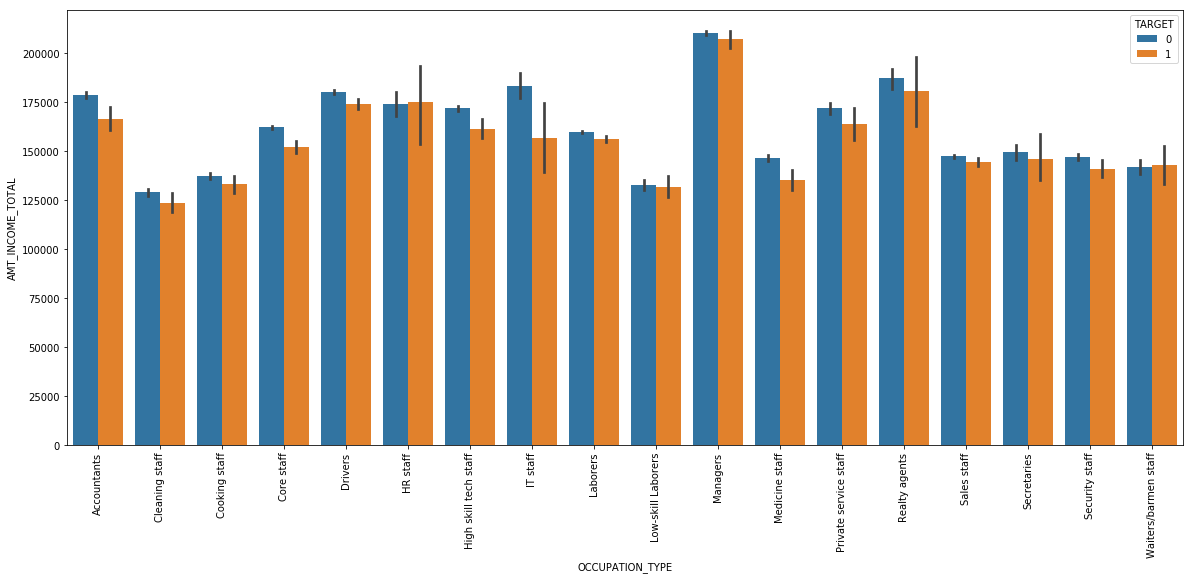

In [65]:
plt.figure(figsize=(20,8))
#d=Target1["NAME_INCOME_TYPE"].value_counts()
ax=sns.barplot("OCCUPATION_TYPE","AMT_INCOME_TOTAL",data=df_income,hue="TARGET")
plt.xticks(rotation=90)
plt.show()

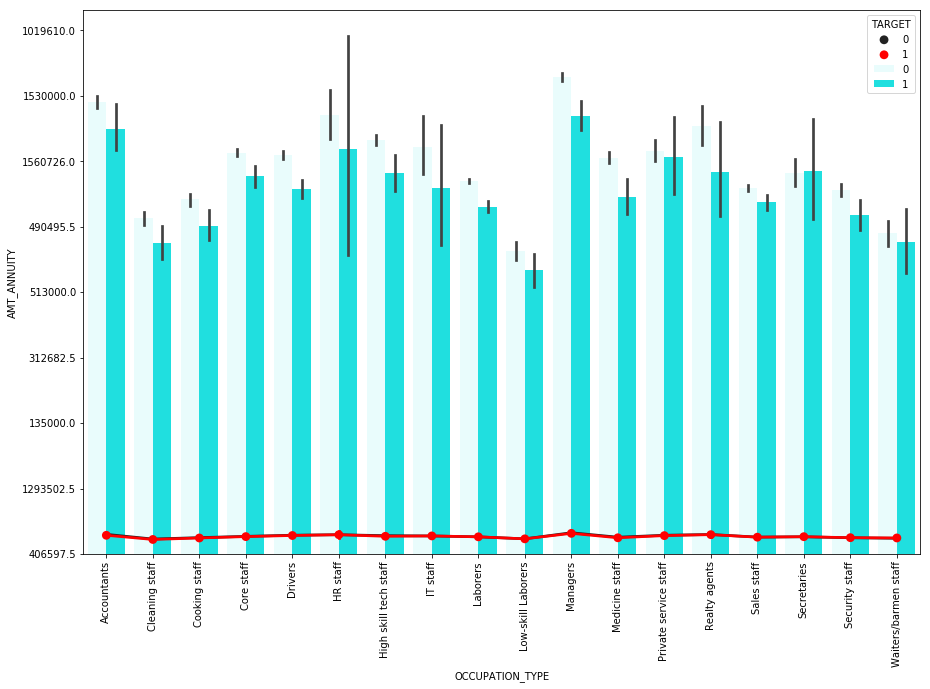

In [69]:
plt.figure(figsize=(15,10))
#Target1.plot.hexbin(x='AMT_INCOME_TOTAL',y='EXT_SOURCE_1')
#plt.hexbin(x='AMT_INCOME_TOTAL',y='DAYS_BIRTH',data='Target1')
#plt.show()
#plt.xlabel(Target1['DAYS_BIRTH'])

ax=sns.barplot(y='AMT_CREDIT',x='OCCUPATION_TYPE',hue='TARGET',data=df_income,color="cyan")



sns.pointplot(ax=ax,y='AMT_ANNUITY',x='OCCUPATION_TYPE',hue='TARGET',data=df_income,color="red")
ax.set_yticklabels(df_income["AMT_CREDIT"])
plt.xticks(rotation=90)

plt.show()

In [71]:
(Target1["OCCUPATION_TYPE"]=='Laborers').sum()

5772

In [48]:
correlations = df_income.corr()["TARGET"].sort_values()


In [49]:
correlations

EXT_SOURCE_3                   -0.179747
EXT_SOURCE_2                   -0.160158
DAYS_BIRTH                     -0.079410
DAYS_EMPLOYED                  -0.074853
EXT_SOURCE_1                   -0.064891
DAYS_LAST_PHONE_CHANGE         -0.056255
DAYS_ID_PUBLISH                -0.051745
FLOORSMAX_AVG                  -0.042913
FLOORSMAX_MEDI                 -0.042699
FLOORSMAX_MODE                 -0.042163
AMT_GOODS_PRICE                -0.036115
REGION_POPULATION_RELATIVE     -0.034557
Installments                   -0.031838
TOTALAREA_MODE                 -0.031666
AMT_CREDIT                     -0.026719
HOUR_APPR_PROCESS_START        -0.024067
FLAG_PHONE                     -0.023826
AMT_INCOME_TOTAL               -0.018735
AMT_REQ_CREDIT_BUREAU_MON      -0.012047
YEARS_BEGINEXPLUATATION_MEDI   -0.010006
YEARS_BEGINEXPLUATATION_AVG    -0.009754
YEARS_BEGINEXPLUATATION_MODE   -0.008940
AMT_ANNUITY                    -0.006986
AMT_REQ_CREDIT_BUREAU_QRT      -0.002153
FLAG_EMAIL      

In [74]:
cur=Target1_num.corr()

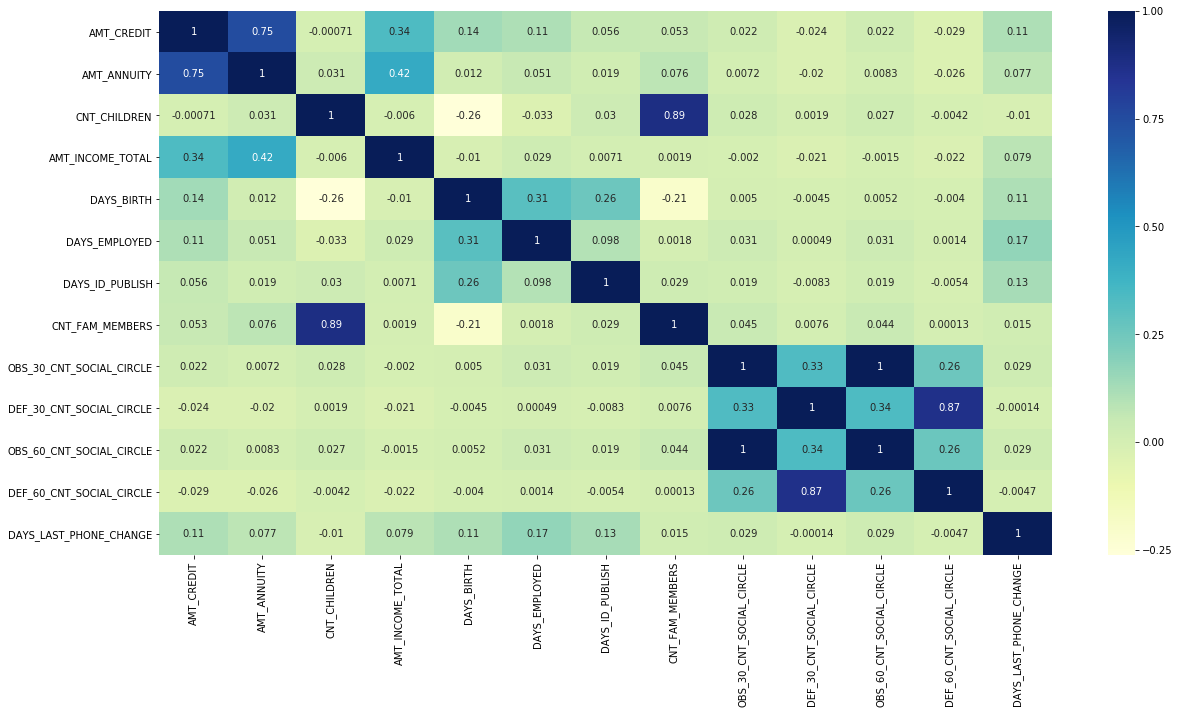

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(cur, cmap="YlGnBu", annot=True)

plt.show()

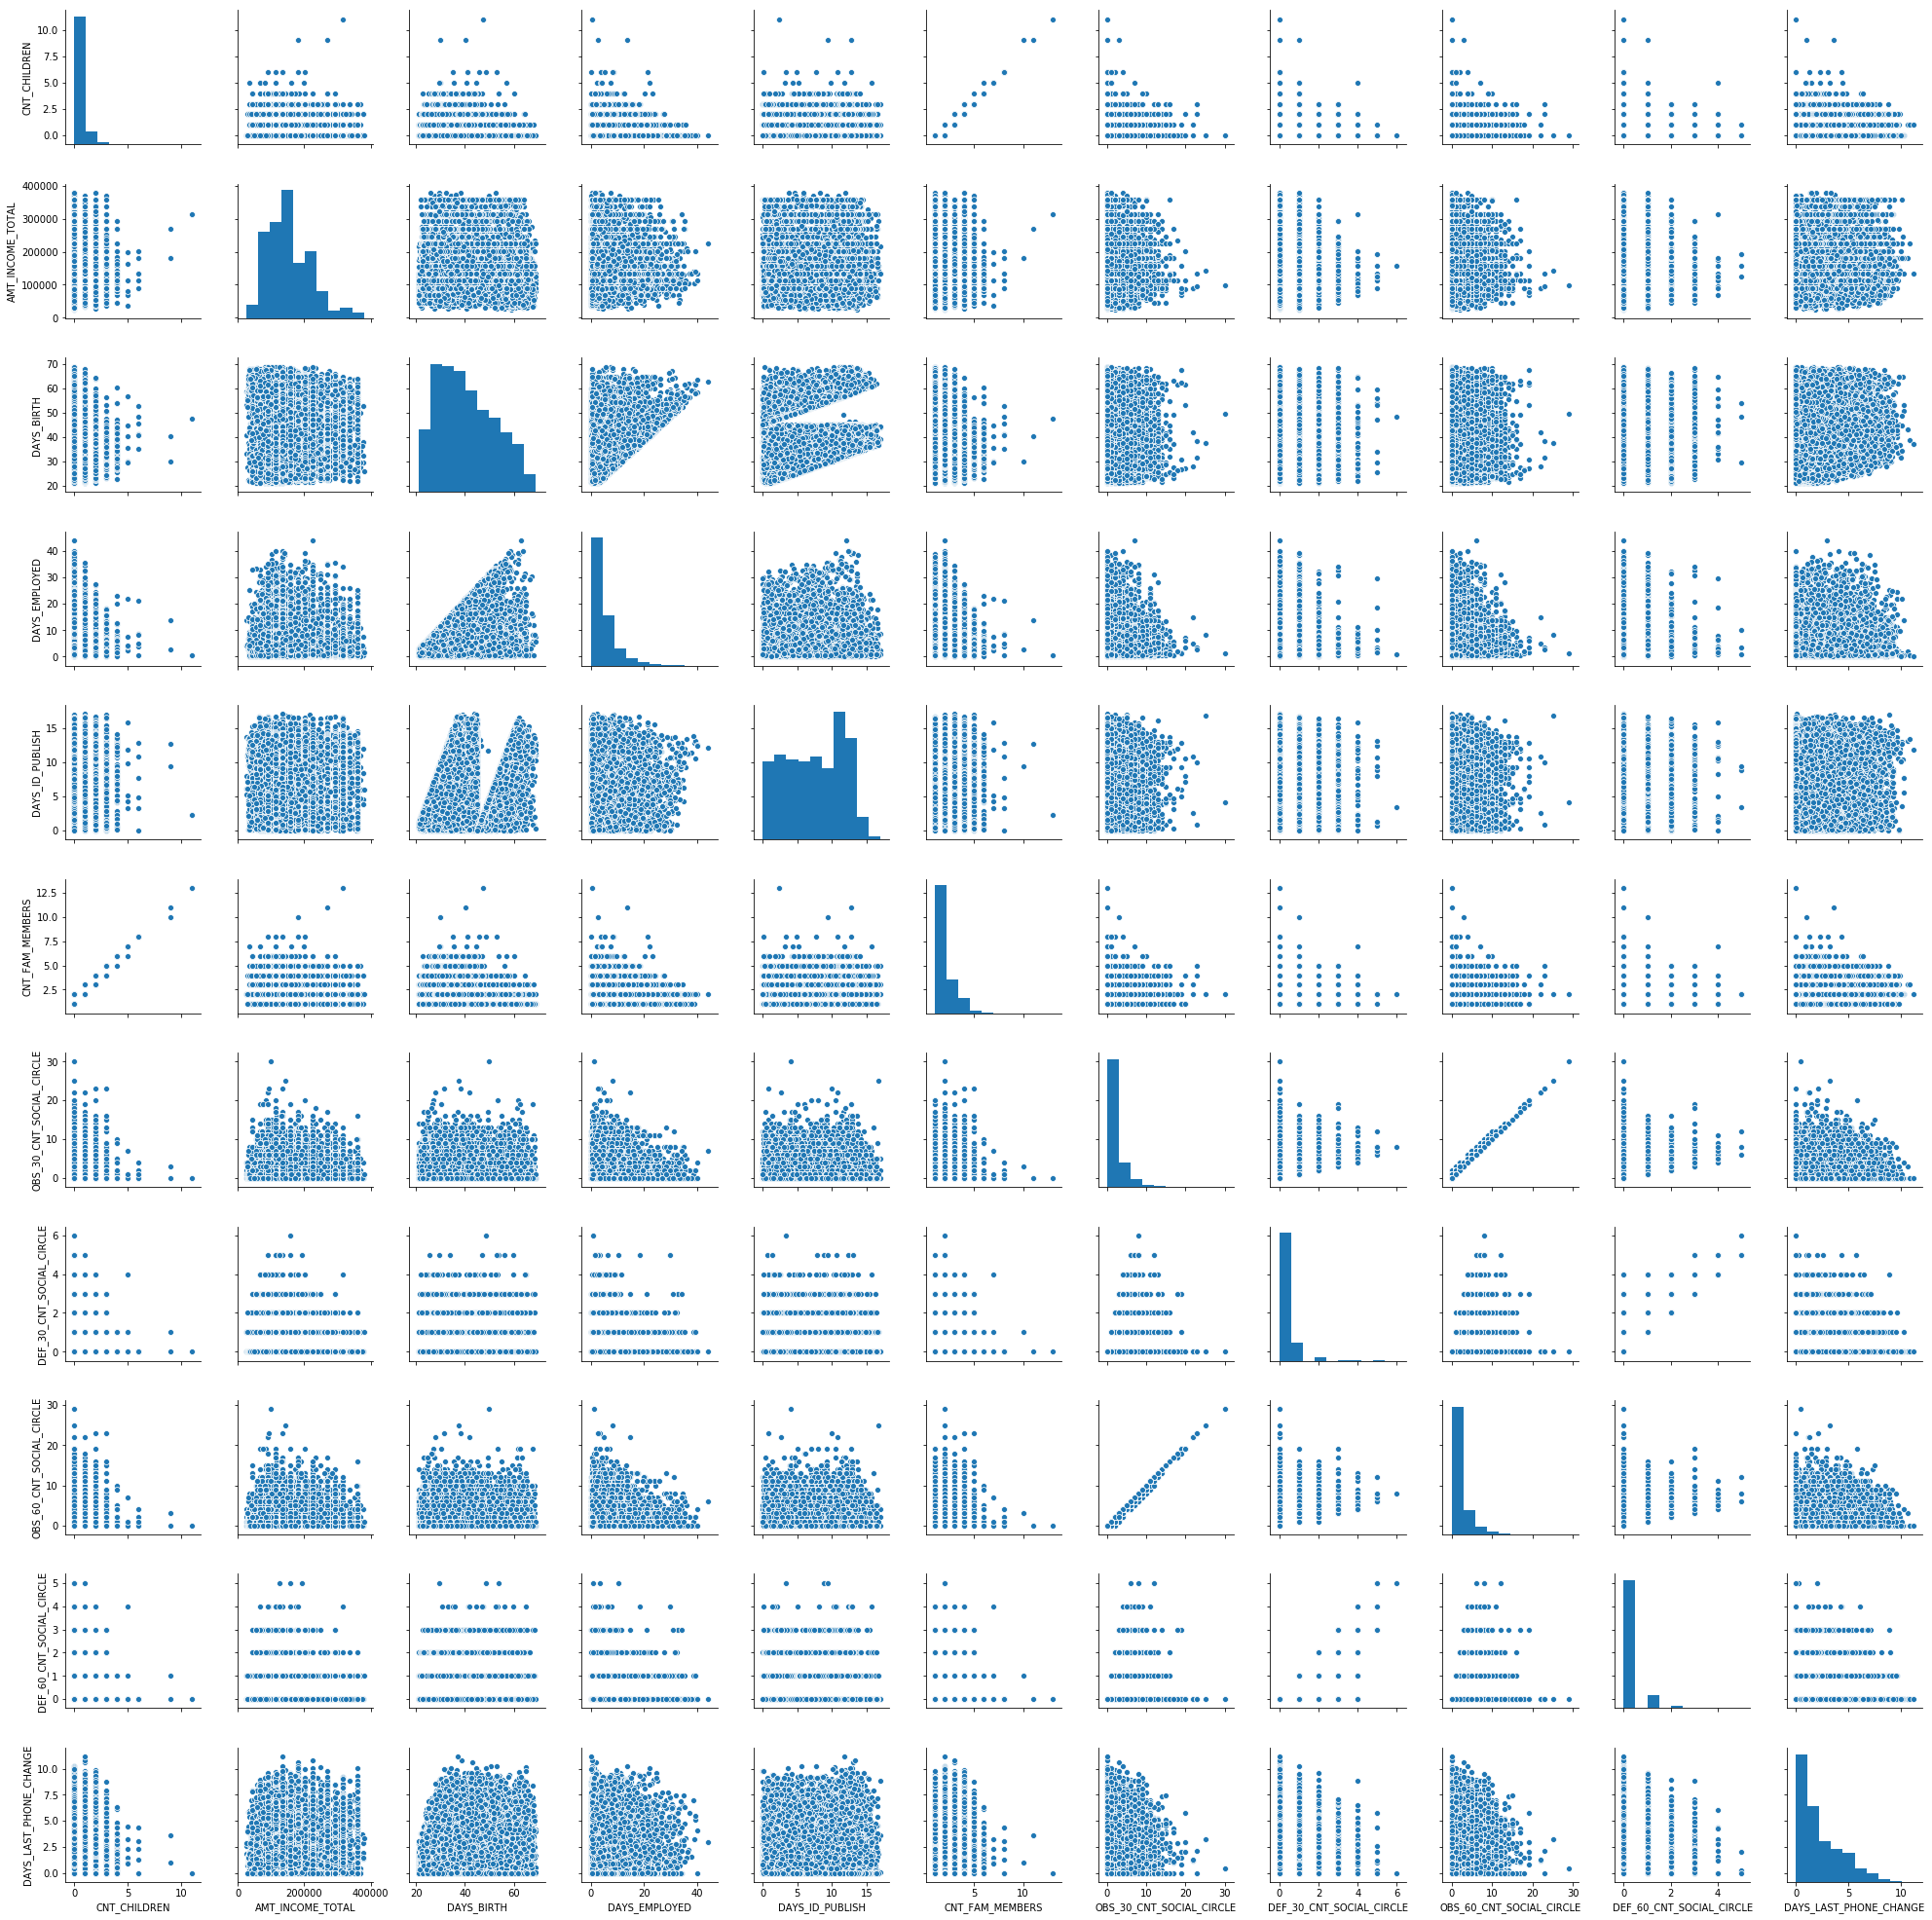

In [52]:
sns.pairplot(Target1_num)
plt.show()

In [76]:
PreviousApplication.shape

(1670214, 37)

In [77]:
PreviousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [78]:
PreviousApplication.isna().sum(axis=0)

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [79]:
# Check the columns which are more than 50% nan values
(PreviousApplication.columns[100*PreviousApplication.isna().sum(axis=0)/len(PreviousApplication.index)> 50])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [80]:
#Remove the columns which are more than 50% nan values
PreviousApplication.drop(PreviousApplication.columns[100*PreviousApplication.isna().sum(axis=0)/len(PreviousApplication.index) >50], axis=1,inplace=True)

In [81]:
df_Pre=round(100*PreviousApplication.isna().sum(axis=0)/len(PreviousApplication.index),2)

In [82]:
#Remove the columns that are not neccessary

PreviousApplication.drop(["AMT_GOODS_PRICE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_CASH_LOAN_PURPOSE","NAME_GOODS_CATEGORY","NAME_PRODUCT_TYPE","CHANNEL_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","CNT_PAYMENT","NAME_YIELD_GROUP","PRODUCT_COMBINATION"], axis=1,inplace=True)

In [83]:
df_Pre.sort_values(ascending=False)

NAME_TYPE_SUITE                49.12
DAYS_FIRST_DUE                 40.30
DAYS_TERMINATION               40.30
DAYS_FIRST_DRAWING             40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
NAME_CASH_LOAN_PURPOSE          0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
N

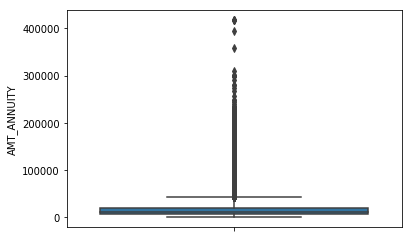

In [84]:
sns.boxplot(y=PreviousApplication["AMT_ANNUITY"])
plt.show()